% alpha and beta are now the leaving probabilities; let's choose random ones every time this runs
maxt=10000; alpha=rand(1); beta=rand(1);
x=nan([1 maxt]); x(1)=0;
p=rand([1 maxt]);
for i=1:maxt
    if x(i)==0 x(i+1)=double(p(i)<alpha); else x(i+1)=1-double(p(i)<beta); end   sample probabilities less than 
end
figure(1); plot(x(1:50)); title(num2str(corrtest(x(2:end),x(1:end-1)))) % this plots the first 50 values only, for clarity; the correlation is actually computed for 10000 values
[(1-alpha)+(1-beta)-1, corrtest(x(2:end),x(1:end-1))]

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
import seaborn as sns
import statistics
import math
import pickle 
import concurrent.futures
from multiprocessing import Process, Manager, Lock
import re 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



In [4]:
alpha = 0.2
beta = 0.3

In [7]:
it = 10000000
p = np.random.uniform(low=0, high=1, size=it)
x = np.zeros(it)

for i in range (0, it-1):
    if x[i]== 0:
        x[i+1]=float((p[i]<alpha)) 
    else:
        x[i+1]=1-float((p[i]<beta))


In [8]:
[np.corrcoef(x[1:it],x[0:(it-1)]),1-(alpha+beta)]

[array([[1.        , 0.49969067],
        [0.49969067, 1.        ]]),
 0.5]

In [12]:
alpha = 0.2
beta = 0.3

In [13]:
it = 10000

Transition_probs = np.array([
    [(1-alpha), alpha],  # From Dry
    [beta, (1-beta)]   # From Wet
])

x = np.zeros(it)
x[0] = 0

for i in range (0, it-1):
    if x[i]== 0:
        current_state = 0
        x[i+1]=  np.random.choice([0, 1], p=Transition_probs[current_state])
    else:
        current_state = 1
        x[i+1]= np.random.choice([0, 1], p=Transition_probs[current_state])


In [14]:
[np.corrcoef(x[1:it],x[0:(it-1)]),1-(alpha+beta)]

[array([[1.        , 0.50347391],
        [0.50347391, 1.        ]]),
 0.5]

the lad -1 auocorrelation for a t a two states {-1,1} markov chain with the following transition matrix[[α, (1-α)] [β, (1-β)]] matrix is 

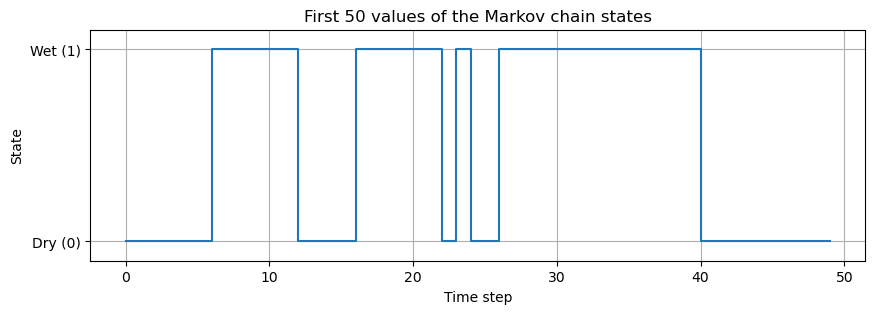

In [15]:
# Plot the first 50 states
plt.figure(figsize=(10, 3))
plt.step(range(50), x[:50], where='post')
plt.ylim(-0.1, 1.1)
plt.xlabel('Time step')
plt.ylabel('State')
plt.title('First 50 values of the Markov chain states')
plt.yticks([0, 1], ['Dry (0)', 'Wet (1)'])
plt.grid(True)
plt.show()

In [115]:
[(alpha)/(alpha+beta), np.mean(x)]

[0.4, np.float64(0.4137)]

In [16]:
alpha = 0.2
beta = 0.3

In [17]:
m_a = (beta)/(alpha + beta) # mean in state A
m_b = alpha / (beta + alpha)
rho = 1-(alpha+beta)


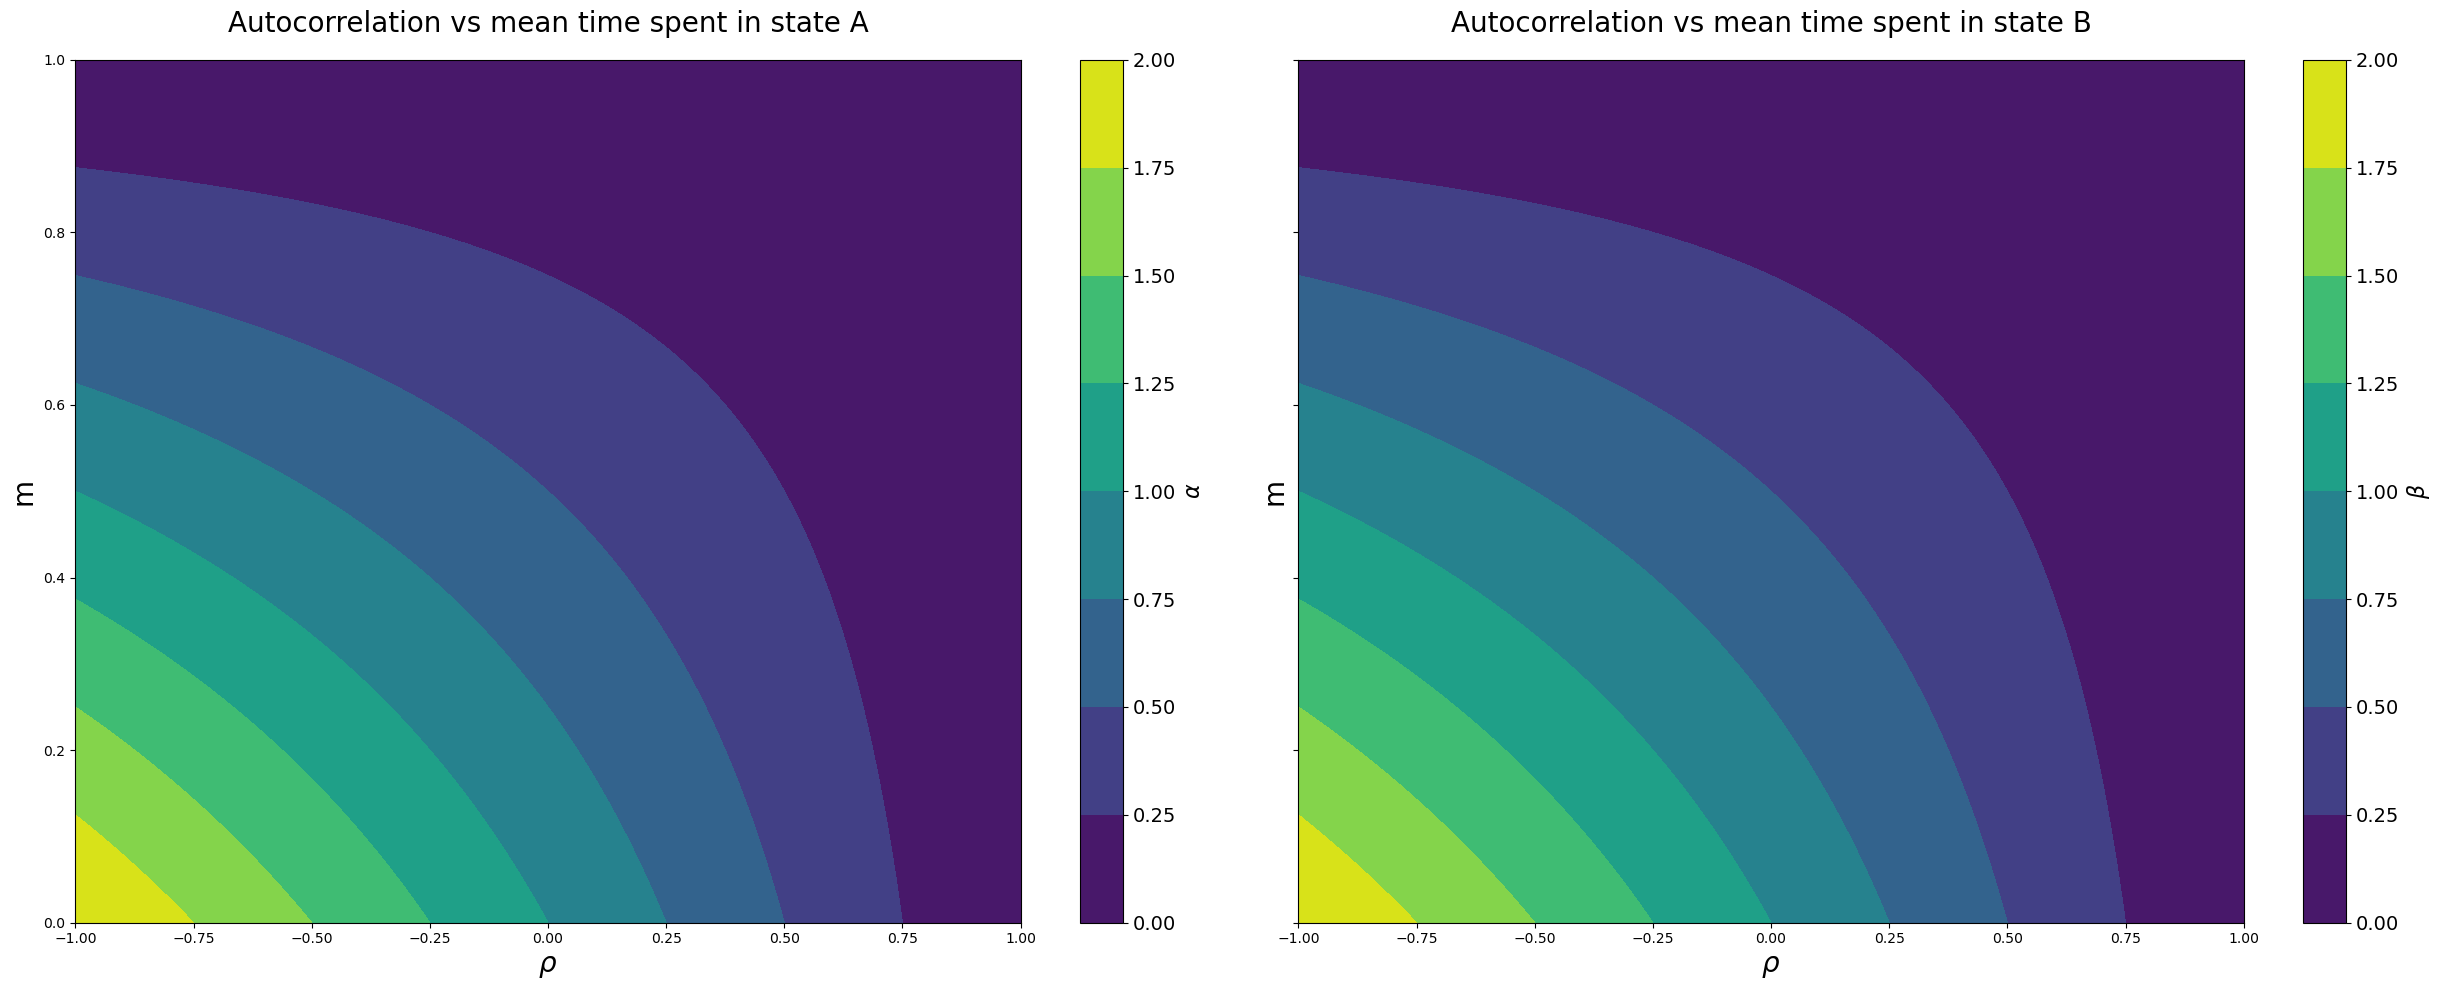

In [22]:
# Define ranges for rho and m
rho = np.linspace(-1, 1, 1000)   # rho between -1 and 1
m_a = np.linspace(0, 1, 1000)     #mean time spent in A

# Create a meshgrid for plotting 3D surface
RHO, M_A = np.meshgrid(rho, m_a)

# Calculate alpha using the formula
ALPHA = (1 - RHO) * (1 - M_A)

rho = np.linspace(-1, 1, 1000)   # rho between -1 and 1
m_b= np.linspace(0, 1, 1000)      #mean time spent in B

# Create a meshgrid for plotting 3D surface
RHO, M_B = np.meshgrid(rho, m_b)
                    
BETA = (1 - RHO) * (1 -M_B)



fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (25,10),sharey=True)
contour = ax[0].contourf(RHO, M_A, ALPHA, cmap='viridis')

cbar =  fig.colorbar(contour,ax=ax[0])
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\alpha$', size=16)

ax[0].set_xlabel(r'$\rho$',fontsize=20)
ax[0].set_ylabel('m', fontsize=20)
ax[0].set_title('Autocorrelation vs mean time spent in state A',fontsize=20, pad=20)

contour = ax[1].contourf(RHO, M_B, BETA, cmap='viridis')

cbar = fig.colorbar(contour, ax=ax[1])
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\beta$', size=16)

ax[1].set_xlabel(r'$\rho$', fontsize=20)
ax[1].set_ylabel('m', fontsize=20)
ax[1].set_title('Autocorrelation vs mean time spent in state B', fontsize=20,pad=20)
fig.tight_layout()

In [ ]:
# create data
df = pd.DataFrame(np.random.randn(6, 6))

# make the values in dataset discrete
# the values will be cut into 3 discrete values: 0,1,2
df_q = pd.DataFrame()
for col in df:
    df_q[col] = pd.to_numeric(pd.qcut(df[col], 3, labels=list(range(3))))

# plot it
sns.heatmap(df_q)
plt.show()

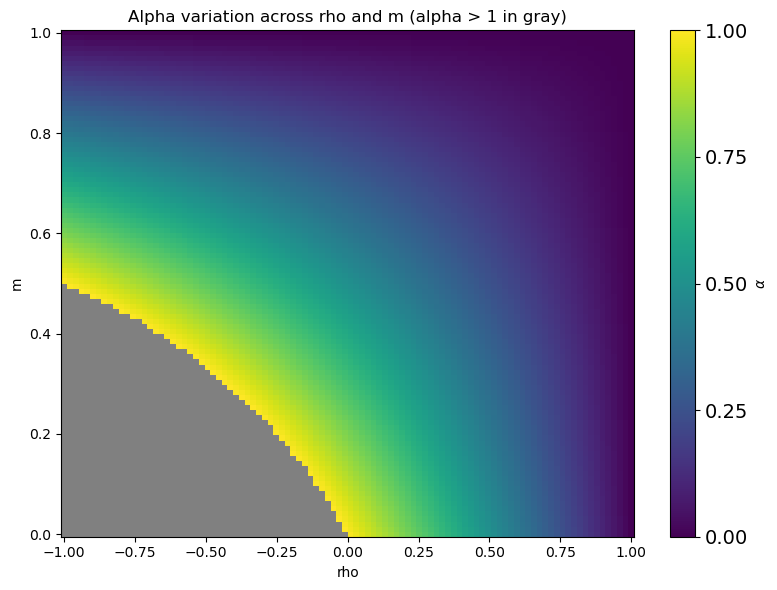

In [36]:


# Create 2D grid
rho = np.linspace(-1, 1, 100)
m = np.linspace(0, 1, 100)
RHO, M = np.meshgrid(rho, m)
ALPHA = (1 - RHO) * (1 - M)

# Mask values > 1
ALPHA_MASKED = np.ma.masked_greater(ALPHA, 1)

# Colormap and normalization
cmap = plt.cm.viridis.copy()  # make a copy so you can safely modify
cmap.set_bad(color='gray')    # gray for masked values
norm = mcolors.Normalize(vmin=0.0, vmax=1.0)  # Force color scale to include 1

# Plot
plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(RHO, M, ALPHA_MASKED, cmap=cmap, norm=norm, shading='auto')
cbar = plt.colorbar(pcm, label=rf'$\alpha$', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=14)

plt.xlabel('rho')
plt.ylabel('m')
plt.title('Alpha variation across rho and m (alpha > 1 in gray)')
plt.tight_layout()
plt.show()




In [4]:
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short
